## Data Description
1. There are 10 independent variables:

2. id: Identification column.

3. carat: Carat weight of the cubic zirconia.

4. cut: Describe the cut quality of the cubic zirconia.

5. Quality in increasing order: Fair, Good, Very Good, Premium, Ideal.

6. color: Colour of the cubic zirconia, with D being the best and J the worst.

7. clarity: Clarity refers to the absence of the Inclusions and Blemishes.

8. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

9. depth: The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

10. table: The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

11. X: Length of the cubic zirconia in mm.

12. Y: Width of the cubic zirconia in mm.

13. Z: Height of the cubic zirconia in mm.

Target variable:

price: Price of the Diamond.

In [3]:
import pandas as pd

In [4]:
## data Ingestion step

df = pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
## no missing falue

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [8]:
#3 Let drop the id column
df = df.drop("id", axis=1)

In [9]:
df.duplicated().sum()

0

In [10]:
## segregate numerical and categorical columns
categorical_column = df.columns[df.dtypes == 'object']
numerical_column = df.columns[df.dtypes !='object']
print(f"Categorical Columns: {categorical_column}")
print(f"Numerical Columns: {numerical_column}")

Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')
Numerical Columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [11]:
df[categorical_column].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [12]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [17]:
df['color'].value_counts()


color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [18]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [19]:
df.shape

(193573, 10)

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


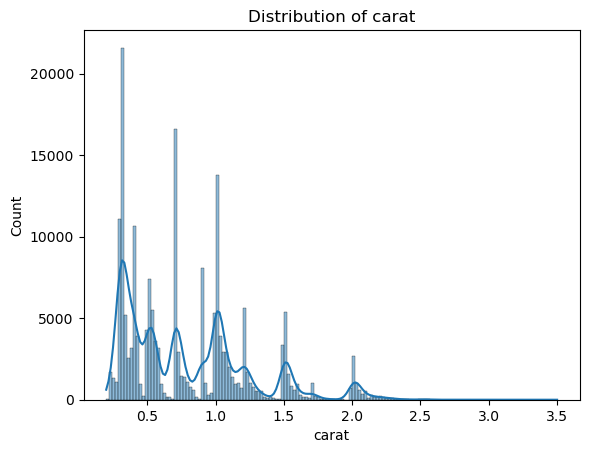

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


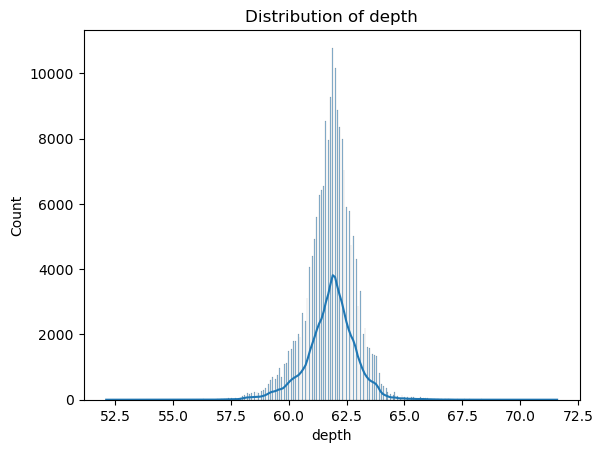

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


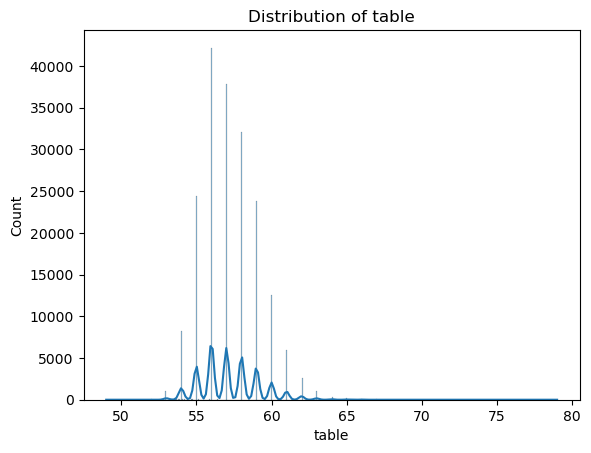

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


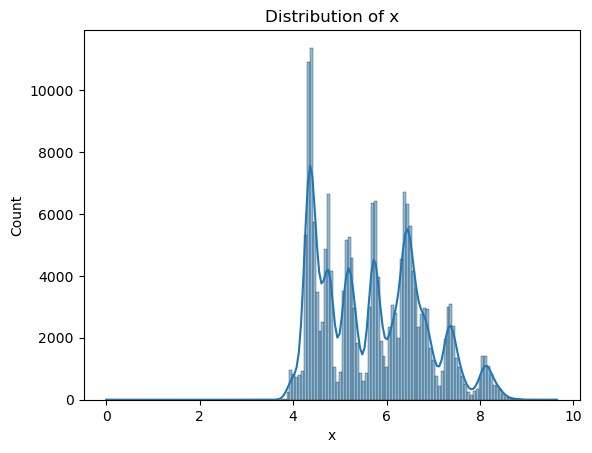

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


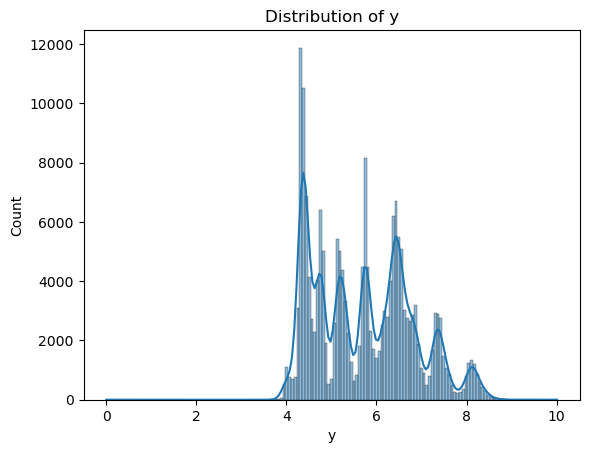

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


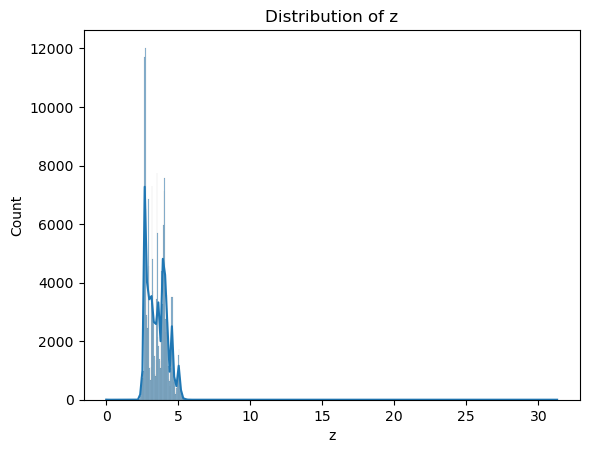

c:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


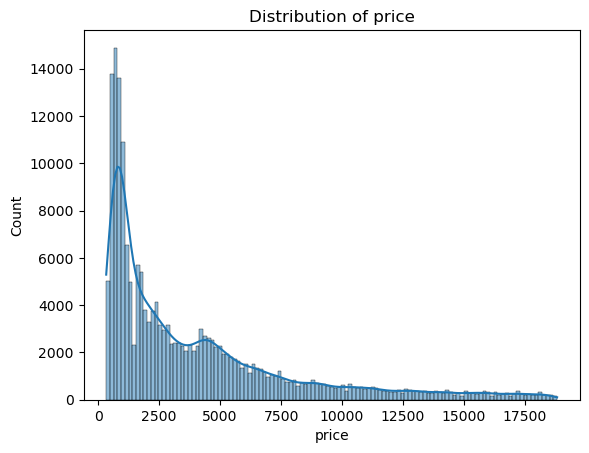

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in numerical_column:
    sns.histplot(data=df, x=i, kde=True)
    plt.title("Distribution of "+i)
    print('\n')
    plt.show()

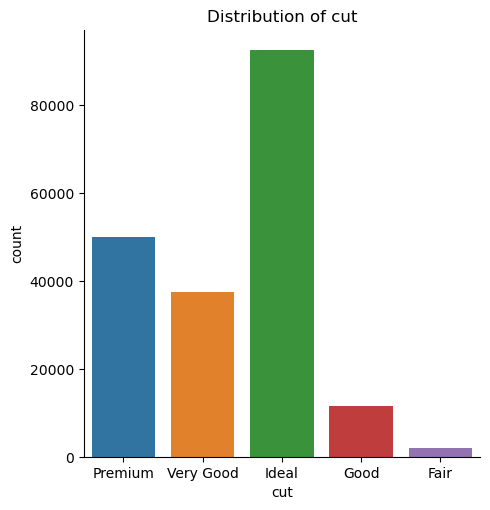

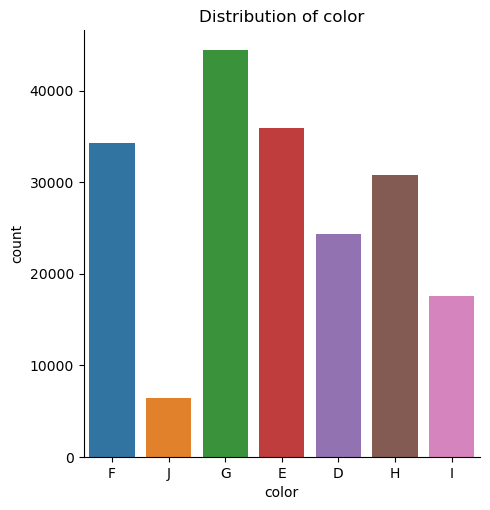

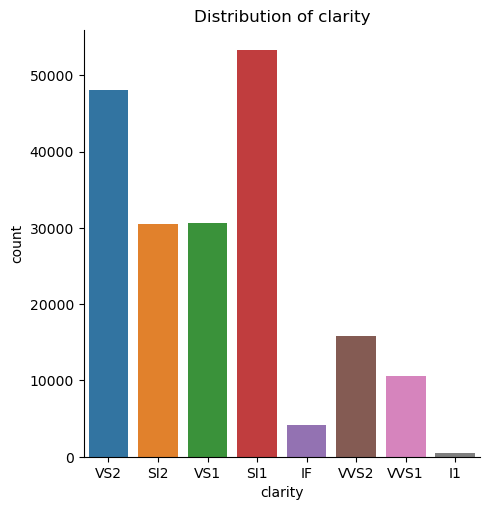

In [23]:
for i in categorical_column:
    sns.catplot(data=df, x=i, kind="count")
    plt.title("Distribution of "+i)
    print('\n')
    plt.show()

<Axes: >

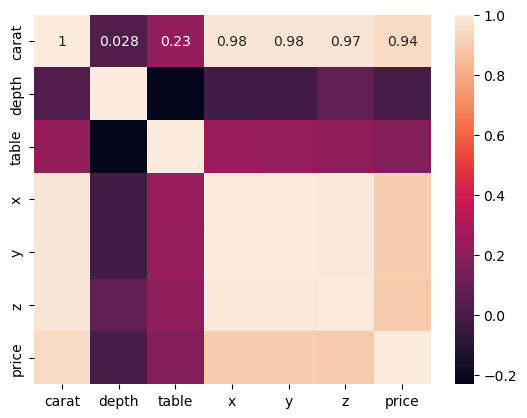

In [31]:
sns.heatmap(df[numerical_column].corr(), annot=True)

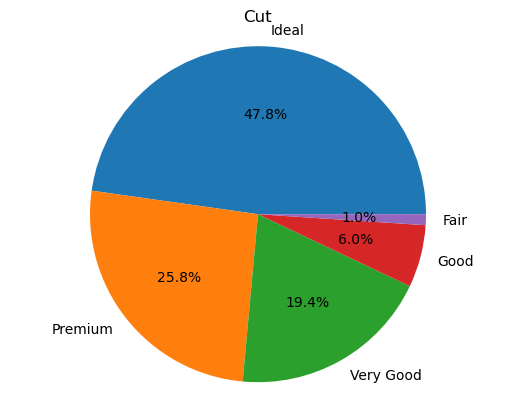

In [26]:
plt.pie(    df['cut'].value_counts(), labels = df['cut'].value_counts().index, autopct='%1.1f%%')
plt.title('Cut')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [32]:
df.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [36]:
cut_mark={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}

In [37]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [39]:
df['cut']=df['cut'].map(cut_mark)

In [40]:
df.cut.unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [41]:
clarity={'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

In [42]:
df['clarity'] = df['clarity'].map(clarity)

In [43]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,F,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,J,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,G,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,G,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,G,4,62.6,59.0,7.65,7.61,4.77,14453


In [44]:
df.color.unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [45]:
color={'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}
df['color']= df['color'].map(color)

In [46]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
